In [64]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from yahoofinancials import YahooFinancials
from datetime import timedelta

import os
import pickle

In [20]:
cik_tik = pd.read_csv('cos_and_jaccard_stats.csv')
final_ciks = pickle.load(open('final_ciks.p','rb'))
cik_tik.head()

,Unnamed: 0,cik,first_date,last_date,min_cos,max_cos,avg_cos,min_jaccard,max_jaccard,avg_jaccard,ticker
0,0,1090872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
1,1,1675149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aa
2,2,1420529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aacg
3,3,1802457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aacq
4,4,1209028,2004-03-15,2020-02-24,0.830653,0.918406,0.879454,0.709508,0.849112,0.785378,aaic


In [35]:
tickers = cik_tik.loc[[(value in final_ciks) for value in cik_tik.cik.astype(str)]].set_index('cik')['ticker']
tickers

cik
1209028    aaic
1069183    aaxn
825313       ab
1144980     abg
1800        abt
           ... 
1168054     xec
72903       xel
917225      xpl
1136869     zbh
109380     zion
Name: ticker, Length: 303, dtype: object

In [118]:
for cik in tickers.index[:2]:
    # iterate through the files
    ticker = str(tickers[cik]).upper()
    path = 'data/' + str(cik) + '.csv'
    sim_scores = pd.read_csv(path)
    #print(sim_scores.head())
    prices_df = pd.DataFrame()
    sim_scores.dates = pd.to_datetime(sim_scores.dates)
    for index, date in enumerate(sim_scores.dates):
        # no score for first date
        start_date = str(sim_scores.dates[index])[:10]
        end_date = str(pd.to_datetime(sim_scores.dates)[index]+timedelta(weeks=12))[:10]
        try:
            prices_df = prices_df.append(yf.download(ticker, start = start_date, end = end_date, progress=False))
        except:
            prices_df = yf.download(ticker, start = start_date, end = end_date, progress=False)
    if prices_df.empty == False:
        print('\n' + str(tickers[cik]).upper(), cik, start_date)
        prices_df['dates'] = pd.to_datetime(prices_df.index)
        prices_df = prices_df.merge(sim_scores, how='outer', left_on = 'dates', right_on = 'dates')
        #print(prices_df.head(100))
        prices_df.to_csv('data/'+str(cik)+'_prices.csv')
        # find out how to merge prices_df with the sim_scores dataframe. probably a 
prices_df.head(100)


1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this date range, symbol may be delisted

1 Failed download:
- AAIC: No data found for this dat

,Open,High,Low,Close,Adj Close,Volume,dates,Unnamed: 0,cosine_score,jaccard_score
0,12.8825,13.2450,12.8800,12.9825,12.9825,4610000,2004-03-04,0.0,NaN,NaN
1,12.7875,12.9450,12.0575,12.1500,12.1500,11481600,2004-03-05,NaN,NaN,NaN
2,13.1500,14.7850,12.8150,14.2725,14.2725,70558000,2004-03-08,NaN,NaN,NaN
3,14.2775,15.0275,13.6500,13.7375,13.7375,39364000,2004-03-09,NaN,NaN,NaN
4,13.8775,14.1050,13.2875,13.3475,13.3475,16527200,2004-03-10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,10.5400,10.8300,10.5300,10.6200,10.6200,728600,2006-05-08,NaN,NaN,NaN
96,10.5600,10.6400,10.4700,10.5100,10.5100,563300,2006-05-09,NaN,NaN,NaN
97,10.6100,10.7000,10.4700,10.5000,10.5000,759600,2006-05-10,NaN,NaN,NaN
98,10.5000,10.6000,10.0000,10.1400,10.1400,1225600,2006-05-11,NaN,NaN,NaN


- Get each one of the dataframes from the csv file
- break up into smaller dataframes for the scores after each 10k was published
- plot them on the same graph with the y axis being `%change from initial` price and x axis being `days since 10k`
could have y axis be percent change from initial or stock price in percent going from zero to 100 to keep a consistent(ish) scale
could also do a horizontal line before the price movements to have a zero-line
could also include an s&p500 index

In [136]:
list(prices_df[prices_df['cosine_score'] > 0].index)

[59, 117, 175, 234, 292, 350, 408, 466, 524, 582, 640, 699, 758, 817]

In [139]:
prices_df.iloc[59:117,:]

,Open,High,Low,Close,Adj Close,Volume,dates,Unnamed: 0,cosine_score,jaccard_score
59,10.44,10.49,10.10,10.11,10.11,2536900,2006-03-16,1.0,0.722931,0.556156
60,10.06,10.22,10.00,10.00,10.00,1804800,2006-03-17,NaN,NaN,NaN
61,10.05,10.34,10.00,10.23,10.23,1813800,2006-03-20,NaN,NaN,NaN
62,10.57,10.61,10.30,10.39,10.39,2622900,2006-03-21,NaN,NaN,NaN
63,10.32,10.84,10.26,10.70,10.70,2618600,2006-03-22,NaN,NaN,NaN
64,11.00,11.24,10.71,10.88,10.88,3423200,2006-03-23,NaN,NaN,NaN
65,10.79,11.13,10.70,10.85,10.85,1557100,2006-03-24,NaN,NaN,NaN
66,10.86,10.92,10.35,10.76,10.76,1578000,2006-03-27,NaN,NaN,NaN
67,10.51,10.75,10.41,10.55,10.55,1581600,2006-03-28,NaN,NaN,NaN
68,10.52,10.80,10.52,10.72,10.72,895000,2006-03-29,NaN,NaN,NaN


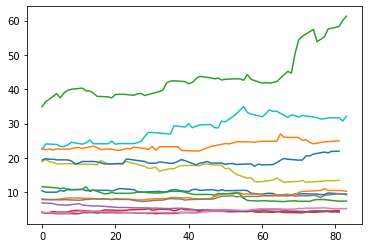

In [164]:
start_dates = list(prices_df[prices_df['cosine_score'] > 0].index)
for i in range(len(start_dates)-1):
    plot_df = prices_df.iloc[start_dates[i]:start_dates[i+1],:]
    time_elapsed = [(date - list(plot_df.dates)[0]).days for date in list(plot_df.dates)]
    opening_prices = list(plot_df.Open.values)
    plt.plot(time_elapsed, opening_prices)

In [148]:
list(plot_df.dates)[0]

Timestamp('2018-03-01 00:00:00')

In [166]:
np.divide(list(plot_df.Open.values),list(plot_df.Open.values)[0])

array([1.        , 1.04212027, 1.11002865, 1.07449852, 1.1166189 ,
       1.13810887, 1.14641824, 1.15587388, 1.13352435, 1.13151862,
       1.11518615, 1.08739252, 1.08338108, 1.07449852, 1.10171917,
       1.10487105, 1.10515754, 1.09627498, 1.10802282, 1.1111747 ,
       1.09426925, 1.12750707, 1.139828  , 1.20085954, 1.21432663,
       1.21690543, 1.21031518, 1.19255006, 1.20372483, 1.23495692,
       1.25415469, 1.24154728, 1.23381087, 1.23954144, 1.22349567,
       1.22979932, 1.23381087, 1.2329512 , 1.22177643, 1.2693409 ,
       1.22922635, 1.19742118, 1.2020057 , 1.1968481 , 1.20315186,
       1.21031518, 1.29484231, 1.28166182, 1.44412606, 1.55988528,
       1.58853857, 1.64555868, 1.54355291, 1.56275067, 1.58366757,
       1.64813748, 1.66991393, 1.72148995, 1.75530073])

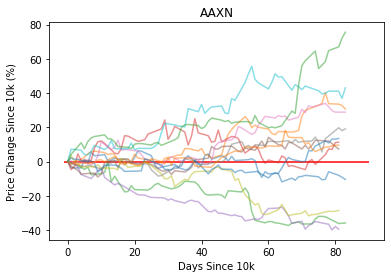

In [187]:
#color code the lines according to the jaccard or cosine score

start_dates = list(prices_df[prices_df['cosine_score'] > 0].index)
plt.hlines(0,xmin = -1,xmax = 90, color='red')
plt.title(str(tickers[cik]).upper())
plt.xlabel('Days Since 10k')
plt.ylabel('Price Change Since 10k (%)')
for i in range(len(start_dates)-1):
    plot_df = prices_df.iloc[start_dates[i]:start_dates[i+1],:]
    time_elapsed = [(date - list(plot_df.dates)[0]).days for date in list(plot_df.dates)]
    opening_prices = np.multiply(np.subtract(np.divide(list(plot_df.Open.values),list(plot_df.Open.values)[0]),1),100)
    plt.plot(time_elapsed, opening_prices, alpha=0.5)